In [1]:
from profiler.core import *

In [2]:
pf = Profiler(workers = 2, tol=1e-6, eps=0.05, embedtxt=True)

In [3]:
pf.session.load_data(name='earthquake', src=FILE, fpath='../table/earthquake/earthquake.csv', check_param=True, na_values='empty')

INFO:profiler.utility:[0.012605428695678711] Load Data start

INFO:profiler.data.dataset:parameters used for data loading:
 {'na_values': 'empty', 'sep': ',', 'header': 'infer', 'dropcol': None, 'dropna': False, 'encoding': 'utf-8', 'normalize': True, 'min_categories_for_embedding': 10}
INFO:profiler.data.dataset:inferred types of attributes: {
    "Burglary": "categorical",
    "MaryCalls": "categorical",
    "Alarm": "categorical",
    "JohnCalls": "categorical",
    "Earthquake": "categorical"
}
INFO:profiler.data.dataset:(possible types: numeric, categorical, text, date)
INFO:profiler.data.dataset:inferred operators of attributes: {'Burglary': ['equal'], 'MaryCalls': ['equal'], 'Alarm': ['equal'], 'JohnCalls': ['equal'], 'Earthquake': ['equal']}
INFO:profiler.data.dataset:(possible operators: equal, notequal, greater_than, less_than)
INFO:profiler.utility:[0.0731818675994873] Load Data execution time: 0.060576438903808594



In [4]:
pf.session.load_training_data(multiplier = None, difference=True)

INFO:profiler.utility:[0.08085203170776367] Create Training Data start

INFO:profiler.data.transformer:needs multiplier = 2 to bound the error in inv cov estimation <= 0.05000000
INFO:profiler.data.transformer:use multiplier = 2, and the bound is 0.00180278
INFO:profiler.data.transformer:Draw Pairs
100%|██████████| 5/5 [00:00<00:00, 289.83it/s]
INFO:profiler.data.transformer:Number of training samples: 5000
INFO:profiler.data.transformer:Computing Differences
INFO:profiler.data.transformer:estimated missing data probability in training data is 0.0000
INFO:profiler.utility:[0.17012715339660645] Create Training Data execution time: 0.08927512168884277



In [5]:
autoregress_matrix = pf.session.learn_structure(sparsity=0, infer_order=True)

INFO:profiler.utility:[0.1759014129638672] Learn Structure start

INFO:profiler.learner:use threshold 0.3172
INFO:profiler.utility:[0.25688624382019043] Learn Structure execution time: 0.08098483085632324



In [6]:
parent_sets = pf.session.get_dependencies(score="fit_error")

INFO:profiler.utility:[0.2633657455444336] Get Dependencies start

INFO:profiler.utility:[0.310091495513916] Get Dependencies execution time: 0.04672574996948242



Burglary -> MaryCalls (0.03986477168724438)
Burglary,MaryCalls -> Alarm (0.006444175466772805)
Alarm -> JohnCalls (0.08227270967748923)
Burglary,MaryCalls,Alarm,JohnCalls -> Earthquake (0.044978697429154654)
{'Burglary': array([], dtype=object), 'MaryCalls': array(['Burglary'], dtype=object), 'Alarm': array(['Burglary', 'MaryCalls'], dtype=object), 'JohnCalls': array(['Alarm'], dtype=object), 'Earthquake': array(['Burglary', 'MaryCalls', 'Alarm', 'JohnCalls'], dtype=object)}


/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


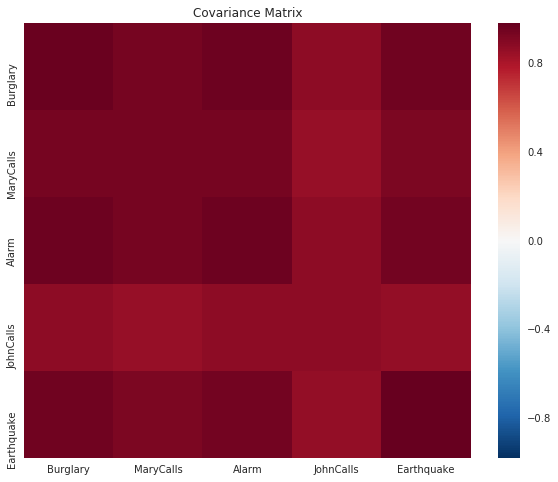

In [7]:
pf.session.visualize_covariance()

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


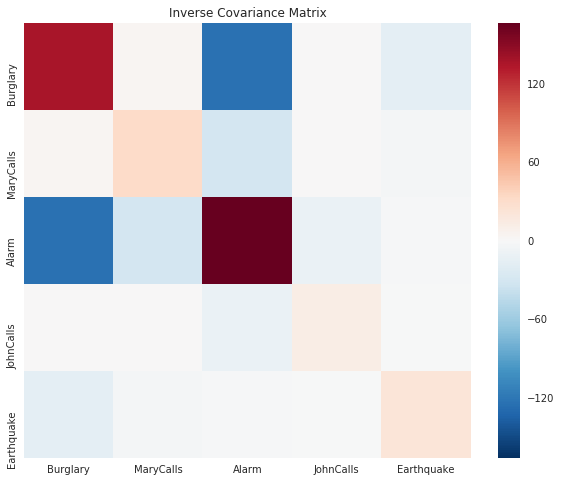

none-zero pairs of abs inv


In [8]:
pf.session.visualize_inverse_covariance()

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


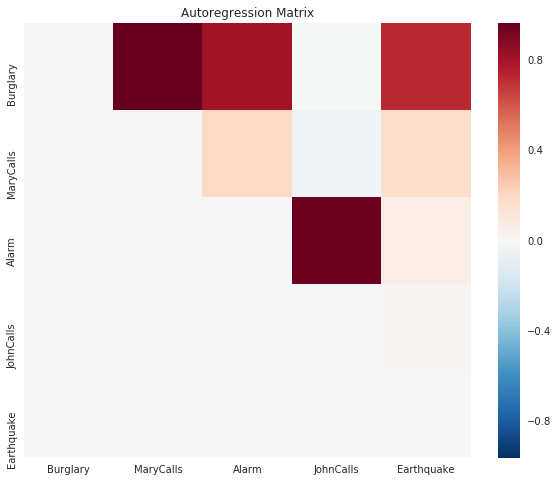

In [9]:
pf.session.visualize_autoregression()

In [10]:
pf.session.timer.get_stat()
pf.session.timer.to_csv()